In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
print(np.__version__)

2.3.1


In [3]:
df = pd.read_csv('C:/Users/cleme/OneDrive/Documentos/ChallengeCoppel/CoppelChallenge/transacciones_retail.csv',  encoding="latin1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
{
  "InvoiceNo": "2000",
  "StockCode": "201",
  "Description": "blah",
  "Quantity": 4,
  "InvoiceDate": "12/1/2010 8:26",
  "UnitPrice": 5,
  "CustomerID": 8000,
  "Country": "United Kingdom"
}

[
  {
    "InvoiceNo": "2000",
    "StockCode": "201",
    "Description": "blah",
    "Quantity": 4,
    "InvoiceDate": "12/1/2010 8:26",
    "UnitPrice": 5,
    "CustomerID": 8000,
    "Country": "United Kingdom"
  },
  {
    "InvoiceNo": "2001",
    "StockCode": "202",
    "Description": "bluh",
    "Quantity": 2,
    "InvoiceDate": "12/1/2010 8:30",
    "UnitPrice": 3,
    "CustomerID": 8001,
    "Country": "France"
  }
]


In [5]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [26]:
# Finding nulls
import numpy as np

def null_list(dataframe):
    df = dataframe.copy()
    null_dict = dict(df.isnull().any())
    columns_with_nulls = []

    for key, value in null_dict.items():
        if value == True:
            columns_with_nulls.append(key)
    return columns_with_nulls
columns_with_nulls = null_list(df)
columns_with_nulls
        
        

['Description', 'CustomerID']

In [32]:
def customer_null_input(dataframe, columns_with_nulls):
    df = dataframe.copy()

    if 'CustomerID' in columns_with_nulls:
        df.dropna(subset=['CustomerID'], inplace=True)
    return df


In [69]:
df_no_nulls = customer_null_input(df, columns_with_nulls)
df_no_nulls

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
# Let´s convert CustomerID to string

df['CustomerID'] = df['CustomerID'].fillna(0)
df['CustomerID'] = df['CustomerID'].astype('int').astype('str')
# 
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


In [5]:
# Let´s convert InvoiceDate to date

# Convert to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Format to 'd-m-y' as string
df['DateColumn'] = df['InvoiceDate'].dt.strftime('%d-%m-%Y')



In [6]:
# Filtering records where the InvoiceNo doesn´t start with C

df = df[~df['InvoiceNo'].str.startswith('C', na=False)]
df = df[df['Quantity']>0]
df = df[df['UnitPrice'] !=0]




In [7]:
# we must know the total price per item
df['total_price_per_item'] = df['Quantity']*df['UnitPrice']

In [148]:
sum(df[(df['CustomerID']=='12347') & (df['DateColumn']=='07-12-2010')].Quantity)

319

In [9]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'DateColumn',
       'total_price_per_item'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530106 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   InvoiceNo             530106 non-null  object        
 1   StockCode             530106 non-null  object        
 2   Description           530106 non-null  object        
 3   Quantity              530106 non-null  int64         
 4   InvoiceDate           530106 non-null  datetime64[ns]
 5   UnitPrice             530106 non-null  float64       
 6   CustomerID            530106 non-null  object        
 7   Country               530106 non-null  object        
 8   DateColumn            530106 non-null  object        
 9   total_price_per_item  530106 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 44.5+ MB


In [187]:
grouped_df = df.groupby(['CustomerID', 'DateColumn']).agg({
    'Quantity': 'sum',
    'total_price_per_item': 'sum',
    'Country': 'first'  # or 'mode', or a custom function
}).reset_index()


# We need to drop the null Customer because we can´t track the correct ID if it´s null


grouped_df = grouped_df[grouped_df['CustomerID']!='0']
grouped_df.rename({'total_price_per_item':'total'}, axis=1, inplace=True)
grouped_df['DateColumn'] = pd.to_datetime(grouped_df['DateColumn'], format='%d-%m-%Y')
grouped_df=grouped_df.sort_values(['CustomerID', 'DateColumn'])
grouped_df

,CustomerID,DateColumn,Quantity,total,Country
273,12346,2011-01-18,74215,77183.60,United Kingdom
276,12347,2010-12-07,319,711.79,Iceland
279,12347,2011-01-26,315,475.39,Iceland
275,12347,2011-04-07,483,636.25,Iceland
278,12347,2011-06-09,196,382.52,Iceland
...,...,...,...,...,...
17032,18283,2011-11-30,134,223.61,United Kingdom
17021,18283,2011-12-06,142,208.00,United Kingdom
17034,18287,2011-05-22,488,765.28,United Kingdom
17033,18287,2011-10-12,990,1001.32,United Kingdom


In [283]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16763 entries, 273 to 17035
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CustomerID                16763 non-null  object        
 1   DateColumn                16763 non-null  datetime64[ns]
 2   Quantity                  16763 non-null  int64         
 3   total                     16763 non-null  float64       
 4   Country                   16763 non-null  object        
 5   NextPurchaseDate          12425 non-null  datetime64[ns]
 6   days_since_last_purchase  16763 non-null  int64         
 7   Target_90Days             16763 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(2)
memory usage: 1.2+ MB


In [150]:
# # grouped_df[grouped_df['CustomerID']=='12347']
# grouped_df['DateColumn'] = pd.to_datetime(grouped_df['DateColumn'])
# grouped_df=grouped_df.sort_values(['CustomerID', 'DateColumn'])
# grouped_df

In [188]:
grouped_df['NextPurchaseDate'] = grouped_df.groupby('CustomerID')['DateColumn'].shift(-1)
grouped_df['days_since_last_purchase'] = ((grouped_df['NextPurchaseDate'] - grouped_df['DateColumn']))
grouped_df['days_since_last_purchase']=grouped_df['days_since_last_purchase'].dt.days
grouped_df['days_since_last_purchase'] = grouped_df['days_since_last_purchase'].fillna(-1)
grouped_df['days_since_last_purchase']=grouped_df['days_since_last_purchase'].astype('int')
grouped_df['Target_90Days'] = np.where((grouped_df['days_since_last_purchase']<=90) & (grouped_df['days_since_last_purchase']!=-1), 1, 0)


grouped_df

,CustomerID,DateColumn,Quantity,total,Country,NextPurchaseDate,days_since_last_purchase,Target_90Days
273,12346,2011-01-18,74215,77183.60,United Kingdom,NaT,-1,0
276,12347,2010-12-07,319,711.79,Iceland,2011-01-26,50,1
279,12347,2011-01-26,315,475.39,Iceland,2011-04-07,71,1
275,12347,2011-04-07,483,636.25,Iceland,2011-06-09,63,1
278,12347,2011-06-09,196,382.52,Iceland,2011-08-02,54,1
...,...,...,...,...,...,...,...,...
17032,18283,2011-11-30,134,223.61,United Kingdom,2011-12-06,6,1
17021,18283,2011-12-06,142,208.00,United Kingdom,NaT,-1,0
17034,18287,2011-05-22,488,765.28,United Kingdom,2011-10-12,143,0
17033,18287,2011-10-12,990,1001.32,United Kingdom,2011-10-28,16,1


In [169]:
# grouped_df['one_lag'] = grouped_df.groupby('CustomerID')['days_since_last_purchase'].shift(1)
# grouped_df

In [170]:
grouped_df[grouped_df['CustomerID']=='18283']

,CustomerID,DateColumn,Quantity,total,Country,NextPurchaseDate,days_since_last_purchase,Target_90Days
17020,18283,2011-01-06,61,108.45,United Kingdom,2011-01-23,17,1
17026,18283,2011-01-23,67,106.55,United Kingdom,2011-02-28,36,1
17031,18283,2011-02-28,59,102.90,United Kingdom,2011-04-21,52,1
17025,18283,2011-04-21,87,117.68,United Kingdom,2011-05-23,32,1
17027,18283,2011-05-23,62,99.47,United Kingdom,2011-06-14,22,1
17023,18283,2011-06-14,52,103.72,United Kingdom,2011-06-23,9,1
17028,18283,2011-06-23,157,203.81,United Kingdom,2011-07-14,21,1
17024,18283,2011-07-14,102,143.19,United Kingdom,2011-09-05,53,1
17019,18283,2011-09-05,95,134.90,United Kingdom,2011-10-27,52,1
17030,18283,2011-10-27,63,114.65,United Kingdom,2011-11-10,14,1


In [189]:
# We need to take out those columns that don´t help the model such as ID´s and dates

for_train_df = grouped_df[['Quantity', 'total', 'Target_90Days', 'Country']].copy()
for_train_df

,Quantity,total,Target_90Days,Country
273,74215,77183.60,0,United Kingdom
276,319,711.79,1,Iceland
279,315,475.39,1,Iceland
275,483,636.25,1,Iceland
278,196,382.52,1,Iceland
...,...,...,...,...
17032,134,223.61,1,United Kingdom
17021,142,208.00,0,United Kingdom
17034,488,765.28,0,United Kingdom
17033,990,1001.32,1,United Kingdom


In [192]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
#Let's use the following function to have a deeper look on the data behavior

def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=10)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

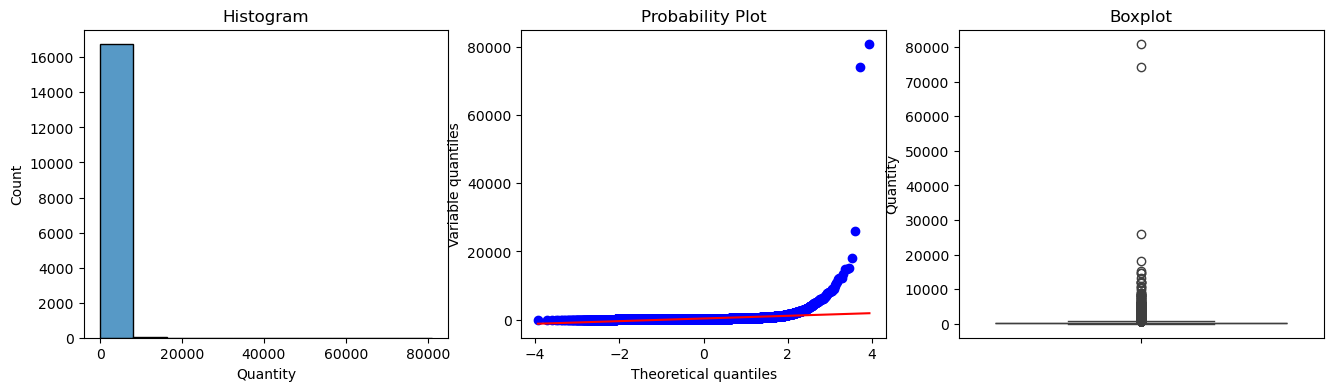

Quantity


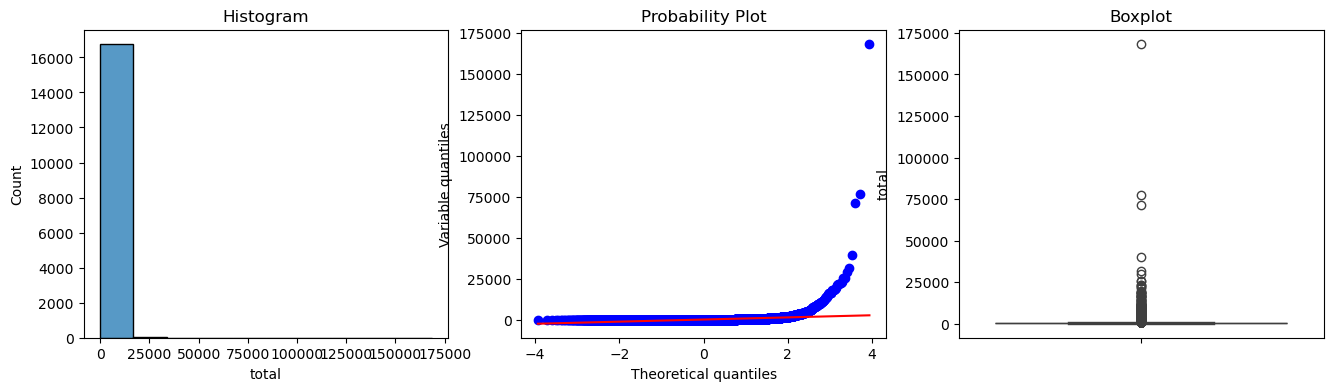

total


In [193]:
for i in for_train_df.drop(['Target_90Days', 'Country'], axis=1).columns:
    diagnostic_plots(for_train_df, i)
    print(str(i))

Text(0.5, 1.0, 'Country hist')

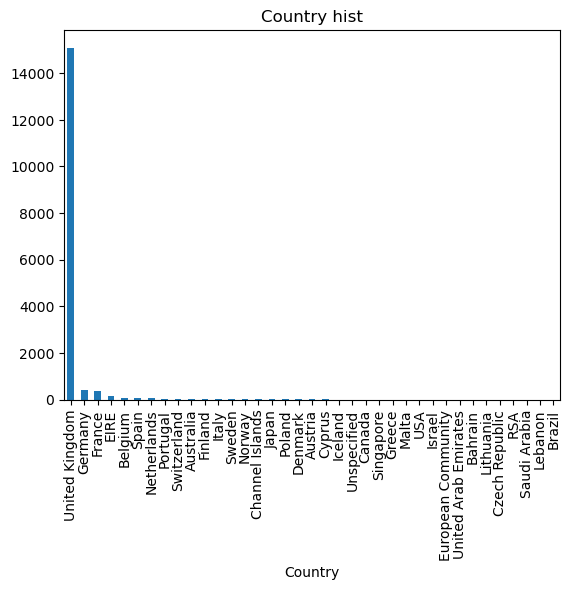

In [179]:
fig = for_train_df['Country'].value_counts().plot.bar()
fig.set_title('Country hist')
# fig.set_ylabel('Numb')

In [194]:
for_train_df['regroup_country'] = np.where(for_train_df['Country']=='United Kingdom', 'United Kingdom', 'other')
for_train_df

,Quantity,total,Target_90Days,Country,regroup_country
273,74215,77183.60,0,United Kingdom,United Kingdom
276,319,711.79,1,Iceland,other
279,315,475.39,1,Iceland,other
275,483,636.25,1,Iceland,other
278,196,382.52,1,Iceland,other
...,...,...,...,...,...
17032,134,223.61,1,United Kingdom,United Kingdom
17021,142,208.00,0,United Kingdom,United Kingdom
17034,488,765.28,0,United Kingdom,United Kingdom
17033,990,1001.32,1,United Kingdom,United Kingdom


Text(0.5, 1.0, 'Country hist')

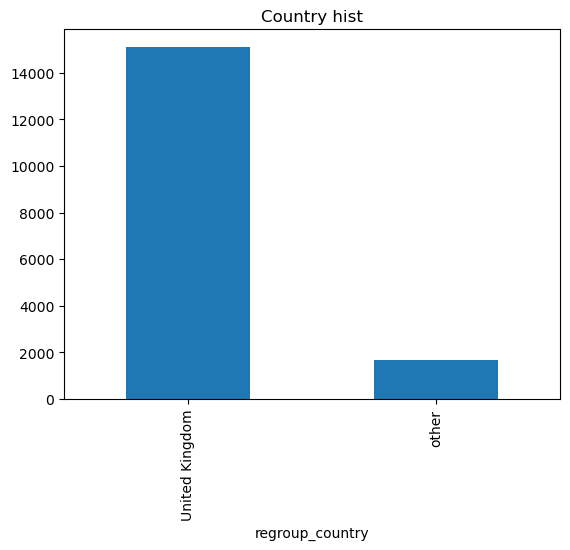

In [195]:
fig = for_train_df['regroup_country'].value_counts().plot.bar()
fig.set_title('Country hist')

In [196]:
# Let's drop the Country column and let´s just keep the regroup_country column
for_train_df.drop('Country', axis=1, inplace=True)

Text(0.5, 1.0, 'Target hist')

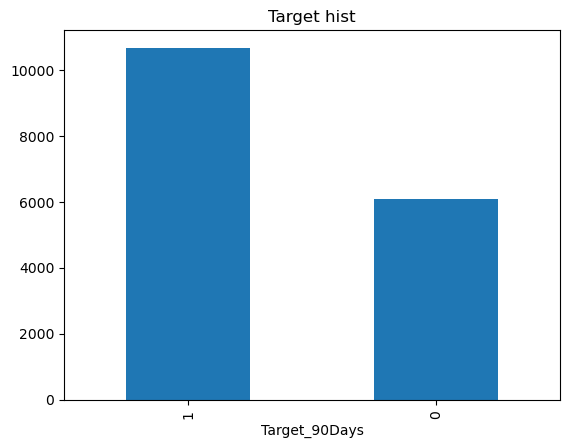

In [197]:
# Let's see the balance of the target variable
fig = for_train_df['Target_90Days'].value_counts().plot.bar()
fig.set_title('Target hist')

In [207]:
for_train_df['regroup_country'] = np.where(for_train_df['regroup_country']=='United Kingdom', 1, 0)
for_train_df

,Quantity,total,Target_90Days,regroup_country
273,74215,77183.60,0,1
276,319,711.79,1,0
279,315,475.39,1,0
275,483,636.25,1,0
278,196,382.52,1,0
...,...,...,...,...
17032,134,223.61,1,1
17021,142,208.00,0,1
17034,488,765.28,0,1
17033,990,1001.32,1,1


In [284]:
for_train_df.columns

Index(['Quantity', 'total', 'Target_90Days', 'regroup_country'], dtype='object')

In [223]:
# Let's split data into train and test

# First: train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    for_train_df.drop('Target_90Days', axis=1), 
    for_train_df["Target_90Days"],                   
    test_size=0.3,                       
    random_state=1                     
)

# Then: validation (15%) and test (15%) from the 30% temp set
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5, 
    random_state=1
)

# shapes
X_train.shape, X_val.shape, X_test.shape


((11734, 3), (2514, 3), (2515, 3))

In [216]:
def plot_boxplot_and_hist(data, variable):
    
    # creating a figure composed of two matplotlib.Axes 
    # objects (ax_box and ax_hist)
    
    f, (ax_box, ax_hist) = plt.subplots(
        2, sharex=True, gridspec_kw={"height_ratios": (0.50, 0.85)}
    )

    # assigning a graph to each ax
    sns.boxplot(x=data[variable], ax=ax_box)
    sns.histplot(data=data, x=variable, ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel="")
    plt.title(variable)
    plt.show()

In [224]:
# Let's try to cap the outliers using quantiles:

def find_limits(df, variable):
    lower_limit = df[variable].quantile(0.05)
    upper_limit = df[variable].quantile(0.95)
    return lower_limit, upper_limit

In [228]:
def quantile_inputation(X_train, X_test, X_val, column):
    lower_limit = X_train[column].quantile(0.05)
    upper_limit = X_train[column].quantile(0.95)
    X_train[column].clip(lower=lower_limit, upper=upper_limit, inplace=True)
    X_test[column].clip(lower=lower_limit, upper=upper_limit, inplace=True)
    X_val[column].clip(lower=lower_limit, upper=upper_limit, inplace=True)
    return X_train, X_test, X_val


C:\Users\cleme\AppData\Local\Temp\ipykernel_1436\415786789.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train["Quantity"].clip(lower=lower_limit, upper=upper_limit, inplace=True)
C:\Users\cleme\AppData\Local\Temp\ipykernel_1436\415786789.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '862.3500000000004' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train["Quantity"].clip(lower=lower_limit

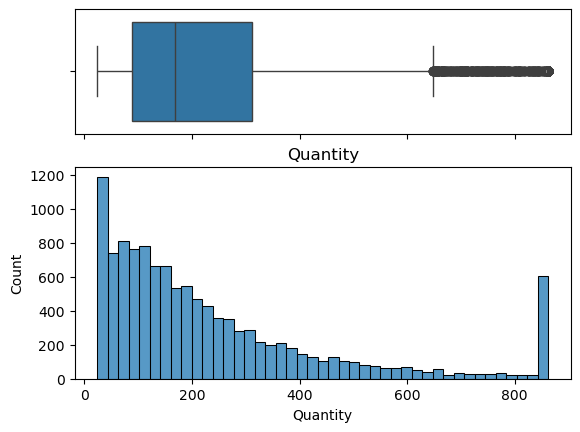

In [227]:
plot_boxplot_and_hist(X_train, "Quantity")

In [229]:
X_train, X_test, X_val = quantile_inputation(X_train, X_test, X_val, 'total')



C:\Users\cleme\AppData\Local\Temp\ipykernel_1436\3824189756.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[column].clip(lower=lower_limit, upper=upper_limit, inplace=True)
C:\Users\cleme\AppData\Local\Temp\ipykernel_1436\3824189756.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

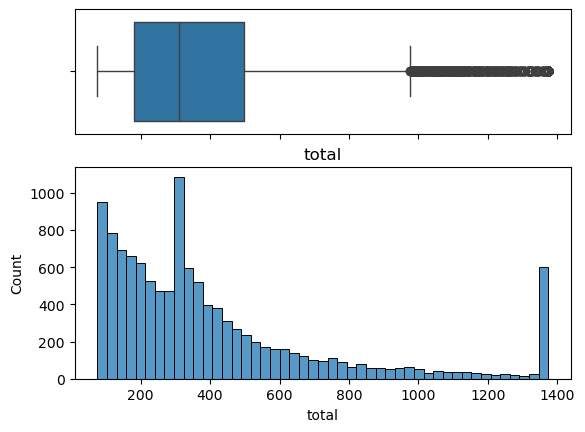

In [230]:
plot_boxplot_and_hist(X_train, "total")


In [232]:
%%markdown
# Train time!

# Train time!


In [235]:
import sys
!{sys.executable} -m pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/150.0 MB 12.5 MB/s eta 0:00:12
    --------------------------------------- 3.4/150.0 MB 11.0 MB/s eta 0:00:14
   - -------------------------------------- 6.6/150.0 MB 12.7 MB/s eta 0:00:12
   -- ------------------------------------- 10.0/150.0 MB 13.8 MB/s eta 0:00:11
   --- ------------------------------------ 13.6/150.0 MB 14.6 MB/s eta 0:00:10
   ---- ----------------------------------- 17.0/150.0 MB 14.8 MB/s eta 0:00:09
   ----- ---------------------------------- 20.2/150.0 MB 15.0 MB/s eta 0:00:09
   ------ --------------------------------- 23.6/150.0 MB 15.1 MB/s eta 0:00:09
   ------- -------------------------------- 26.7/150.0 MB 15.1 MB/s eta 0:00:09
   ------- -------------------------------- 29.9/150.0 MB 15.3 MB/s eta 0:00:08
   -------- ------------------------------- 33.0/150.0 MB 15.3 MB/s eta 0:00:08
   --------- ------------------------------ 35.9/150

In [238]:
import sklearn
print(sklearn.__version__)

1.6.1


In [280]:
import xgboost
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

def trainer():

    counts = y_train.value_counts()

    # Calculate coefficient: count of 1s divided by count of 0s
    coeff = counts[1] / counts[0]

    models = [RandomForestClassifier(), GradientBoostingClassifier(), XGBClassifier(scale_pos_weight = coeff)]

    models_names=['random', 'gradient', 'xgb']

    models_scores = {}
    models_trained = {}

    for name, model in zip(models_names, models):
        pipeline_model = Pipeline([('standard', StandardScaler()), (name, model)])

        pipeline_model.fit(X_train, y_train)

        y_pred = pipeline_model.predict(X_val)
        
        precision = precision_score(y_val, y_pred, zero_division=0)

        models_scores[name] = precision
        models_trained[name] = pipeline_model
    
    max_precision_model = max(models_scores, key=models_scores.get)
    final_pred = models_trained[max_precision_model].predict(X_test)
    final_precision = precision_score(y_test, final_pred, zero_division=0)

    return max_precision_model, models_trained[max_precision_model], final_precision








In [281]:
nombre, modelo, precision  = trainer()

In [282]:
precision

0.6454997239094423

In [278]:
champion = modelo.predict(X_val)

for value in set(champion):
    print(list(champion).count(value))

730
1784


In [2]:
import sys
import os

# Asume que estás corriendo el notebook dentro de src/
sys.path.append(os.path.abspath('.'))

In [4]:
sys.path.append(os.path.abspath('src'))